# Condiciones iniciales del sistema Lorenz

Ya hemos visto como podemos resolver el sistema de ecuaciones de Lorenz y como podemos de esa manera simular y animar la famosa "Mariposa".

A continuación, veremos como la **condición inicial** es un punto clave y porque estos sistemas se llaman complejos. Para ello, vamos a definir una **pequeña perturbación** en mi sistema $\delta = 0.01$ que va a afectar a una de las coordenadas iniciale (0,1,0).
Después, comparemos los resultados de ambas simulaciones y veremos a partir de qué punto la diferencia de las trayectorias es mayor que una **tolerancia** $\nu = 0.1$.

Por último, veremos una pequeña simulación de como han cambiado las trayectorias como diferentes perturbaciones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

In [2]:
def metodo_Rk(f,t0,X0,t_final,h):

    n = round((t_final-t0)/h)
    t=np.linspace(t0,t_final,n+1)
    m = len(X0)
    x = np.zeros((n+1, m))
    x[0] = X0
    for i in range(n):
        k1 = h * f(x[i])
        k2 = h * f(x[i] + k1/2)
        k3 = h * f(x[i] + k2/2)
        k4 = h * f(x[i] + k3)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / float(6)
    return t, x

def sistema_lorentz(x,sigma,beta,rho):
 
    dx_dt=sigma*(x[1]-x[0])
    dy_dt=x[0]*(rho-x[2])-x[1]
    dz_dt=x[0]*x[1]-beta*x[2]
    return np.array([dx_dt,dy_dt,dz_dt])

In [ ]:
sigma = 10 #    10  16  14 
beta = 8/3 #    8/3  4  3   
rho = 28   #    99.86 45.92 35  
X0 = np.array([0,1,0])
t0 = 0
t_final = 200
h = 0.01

# Cálculo del sistema de Lorenz
t, x = metodo_Rk(lambda x: sistema_lorentz(x, sigma, beta, rho), t0, X0, t_final, h)

# Cálculo de la perturbación + el sistema de Lorenz para las tres coordenadas, almacenando las perturbaciones en un diccionario

delta = 0.01
perturbaciones = {}

for i in range(len(X0)):
    X0_pert = X0.copy()
    X0_pert[i] += delta 
    t_pert, x_pert = metodo_Rk(lambda x: sistema_lorentz(x, sigma, beta, rho), t0, X0_pert, t_final, h)
    perturbaciones[f'per_{i}'] = (t_pert, x_pert) 
    print("Perturbación:", X0_pert)

Perturbación: [0.01 1.   0.  ]
Perturbación: [0.   1.01 0.  ]
Perturbación: [0.   1.   0.01]


In [12]:
#Comporamos los resultados y vemos a partir de que momento empiezan a divergir
tolerancia = 0.1

for i in range(len(X0)):
    t_pert, x_pert = perturbaciones[f'per_{i}']
    diferencia = np.abs(x[:, i] - x_pert[:, i])
    indice_diferencia = np.where(diferencia > tolerancia)[0]
    if len(indice_diferencia) > 0:
        primer_indice = indice_diferencia[0]
        print(f"Las soluciones para la perturbación {i} empiezan a divergir a partir del tiempo t = {t[primer_indice]:.2f} con una diferencia de {diferencia[primer_indice]:.2f}.")
    else:
        print(f"Las soluciones para la perturbación {i} no divergen dentro del intervalo de tiempo considerado.")

Las soluciones para la perturbación 0 empiezan a divergir a partir del tiempo t = 0.30 con una diferencia de 0.11.
Las soluciones para la perturbación 1 empiezan a divergir a partir del tiempo t = 0.25 con una diferencia de 0.11.
Las soluciones para la perturbación 2 empiezan a divergir a partir del tiempo t = 12.79 con una diferencia de 0.11.


Observamos, que una pequeña perturbación en las diferentes coordenadas ha divergido a diferentes tiempos con respecto de la condición original. A continuación, observaremos como esa distancia a aumentado de manera sobrecogedora a lo largo del tienpo.

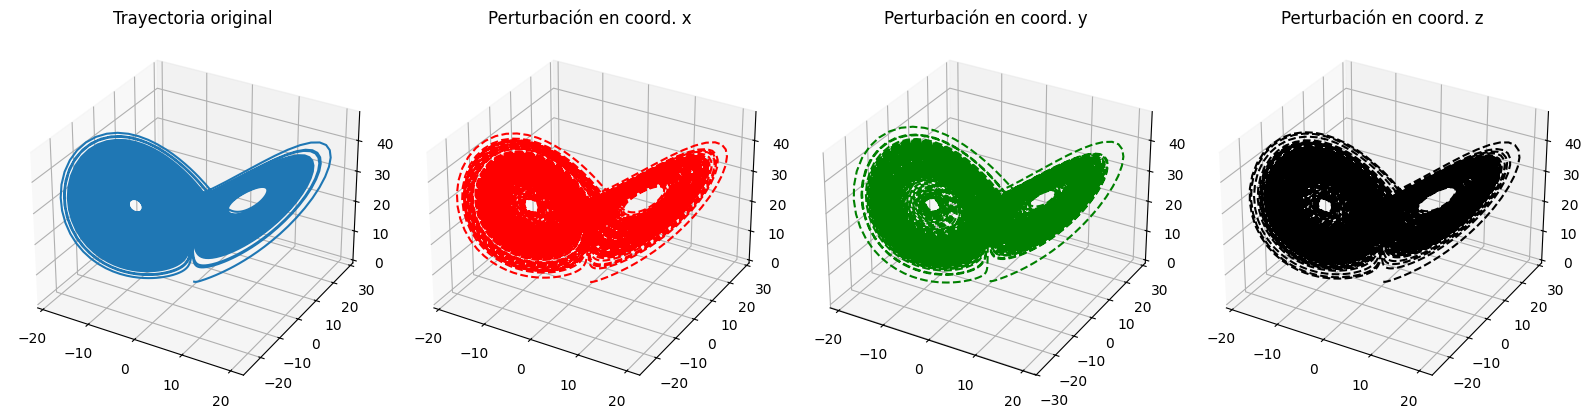

In [20]:
fig = plt.figure(figsize=(16, 4))

# Trayectoria original
ax1 = fig.add_subplot(1, len(X0)+1, 1, projection='3d') # Hacemos un subplot para la trayectoria original funciona (numero de filas, número de columnas, índice del ploteado)
ax1.plot(x[:,0], x[:,1], x[:,2])
ax1.set_title('Trayectoria original')

color = ['r', 'g', 'black']
coordenadas = ['x', 'y', 'z']
# Perturbaciones
for i in range(len(X0)):
    ax = fig.add_subplot(1, len(X0)+1, i+2, projection='3d') 
    t_pert, x_pert = perturbaciones[f'per_{i}']
    ax.plot(x_pert[:,0], x_pert[:,1], x_pert[:,2], linestyle='--', color=color[i])
    ax.set_title(f'Perturbación en coord. {coordenadas[i]}')

plt.tight_layout()
plt.show()


Para que sea más visual, podemos hacer una animación. La animación está en **simulacion.py**.